In [42]:
#Suja Basnet
#Midterm
#K-NN Classifier



In [63]:
#Importing all the necessary libraries
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


Reading the iris dataset. While reading, we will also check if there are any null values as well as the number of different species in the data. (Should be 3 as our dataset has 3 species). We will also assign all the three species categories a particular number, 0,1 and 2.

In [70]:
df = pd.read_csv('iris.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [71]:
df['species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [72]:
df.isnull().values.any()

False

In [73]:
df['species'] = df['species'].map({'Iris-setosa' :0, 'Iris-versicolor' :1, 'Iris-virginica' :2}).astype(int) #mapping numbers
df.head()


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


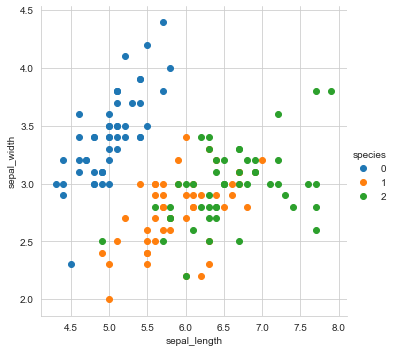

In [74]:
#plotting the datasets
sns.set_style("whitegrid");
sns.FacetGrid(df, hue='species', height=5) \
.map(plt.scatter, "sepal_length", "sepal_width") \
.add_legend();
plt.show()

Normalizing the data. Normalisation is basically bringing all the values of different features on a same scale. As different features has different scale, normalising helps us and the model to optimise it’s parameters more efficiently. We normalise all our input from scale: 0 to 1. Here, X is our inputs(hence dropping the classified species) and Y is our output(3 classes).

In [75]:
x_data = df.drop(['species'],axis=1)
y_data = df['species']
MinMaxScaler = preprocessing.MinMaxScaler()
X_data_minmax = MinMaxScaler.fit_transform(x_data)
data = pd.DataFrame(X_data_minmax,columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
data.head()

,sepal_length,sepal_width,petal_length,petal_width
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.067797,0.041667
2,0.111111,0.500000,0.050847,0.041667
3,0.083333,0.458333,0.084746,0.041667
4,0.194444,0.666667,0.067797,0.041667


Finally, we have reached to the point of training the dataset. We use the built-in KNN algorithm from sci-kit learn. We split the our input and output data into training and testing data, as to train the model on training data and testing model’s accuracy on the testing model. We choose a 80%–20% split for our training and testing data.


In [76]:
X_train, X_test, y_train, y_test = train_test_split(data, y_data,test_size=0.2, random_state = 1)
knn_clf=KNeighborsClassifier()
knn_clf.fit(X_train,y_train)
ypred=knn_clf.predict(X_test) #These are the predicted output values
print(knn_clf)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')


Here, we see that the classifier chose 5 as the optimum number of nearest neighbours to classify the data best. Now that we have built the model, our final step is to visualise the results. We calculate the confusion matrix, the precision recall parameters and the overall accuracy of the model.


In [77]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, ypred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, ypred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,ypred)
print("Accuracy:",result2)

Confusion Matrix:
[[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.92      0.96        13
           2       0.86      1.00      0.92         6

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30

Accuracy: 0.9666666666666667
